<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 2nd exercise: <font color="#C70039">Work with Boxplots for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: Finn Heydemann
* Date:   28.10.2023

<img src="https://r-graph-gallery.com/img/other/boxplot_explanation.png" style="float: center;" width="800">
<img src="https://i2.wp.com/upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/550px-Boxplot_vs_PDF.svg.png?w=578" style="float: center;" width="800">


---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using boxplots to detect anomalies. Try to interpret the boxplot. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and create a boxplot for each of them
5. interpret the visual results and describe them
6. how can you test your data for being normally distributed? 
-----------------------------------------------------------------------------------

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
np.random.seed(1)


In [2]:
# multiply and add by random numbers to get some real values
# randn generates samples from the normal distribution (important - see below)
random_data = np.random.randn(50000)  * 20 + 20

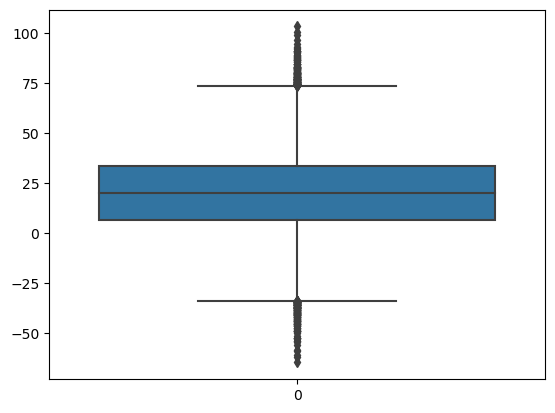

In [3]:
sns.boxplot(data=random_data)
plt.show()

In [29]:
def get_outliers(data): 
    q25, q75 = np.quantile(data, 0.25), np.quantile(data, 0.75)
    iqr = q75 - q25
    u_bound, l_bound = q75 + 1.5 * iqr, q25 - 1.5 * iqr
    return data[np.logical_or(data < l_bound, data > u_bound)]

get_outliers(random_data)

array([-35.8617    ,  80.61714225, -35.65068935,  99.17205408,
       -35.81992813,  86.42157512, -33.96723483, -41.07528761,
        78.34617526,  76.54599588,  74.23899748, -43.067149  ,
       -40.3206397 ,  88.65326864, -35.82888076,  76.87877139,
       -41.28282712,  94.80497807,  74.58924271,  77.88772383,
        82.7009468 ,  84.76686394, -34.78283478, -37.44100501,
       -34.20787481,  75.74722896,  74.12249844,  77.87185104,
        74.84310423,  76.95564235,  75.54105986, -36.03124433,
        76.38174189, -45.0606847 ,  74.34772486, -34.39876182,
       -38.28997835,  77.08848163,  74.61690622,  82.64059456,
        80.25509136,  76.43577761, -36.89875188, -39.69672273,
       -43.81232694, -45.21230192, -33.97837966, -37.02139085,
       -34.16678629, -38.50610072,  88.08604551,  79.51578577,
       -34.21033755,  77.81616357,  82.36959182,  85.97081047,
        82.9796805 , -36.04264086,  78.5366674 , -34.46354787,
       -45.89716813, -34.07986795, -41.11266481, -35.21

<Axes: >

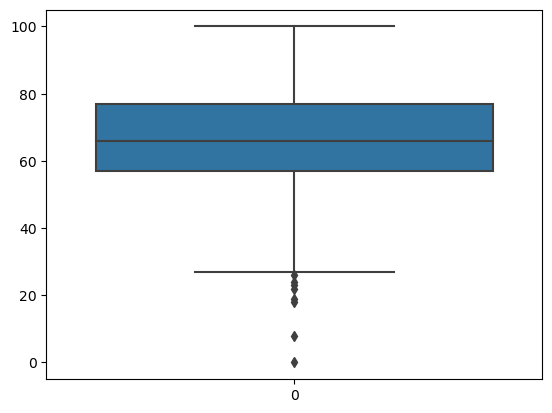

In [24]:
import pandas as pd 

data = pd.read_csv("data/exercise_1/StudentsPerformance.csv")["math score"]
sns.boxplot(data)

In [31]:
get_outliers(data)

17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64

As can be seen 8 students are worse the then lower limit which makes them outliers. These are the same students as in exercise one plus 5 more. 

In [32]:
data = pd.read_csv("data/exercise_1/city_temperature.csv")
data.drop(data[data["AvgTemperature"] == -99].index, inplace=True)
data["AvgTemperature"] = (data["AvgTemperature"] - 32) * 5/9 
data["date"] = pd.to_datetime(data[["Year", "Month", "Day"]])
data = data.set_index("date").groupby(["City", pd.Grouper(freq="D")])["AvgTemperature"].mean()
data = data.reset_index()

/tmp/ipykernel_63548/3201813435.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/exercise_1/city_temperature.csv")


<Axes: >

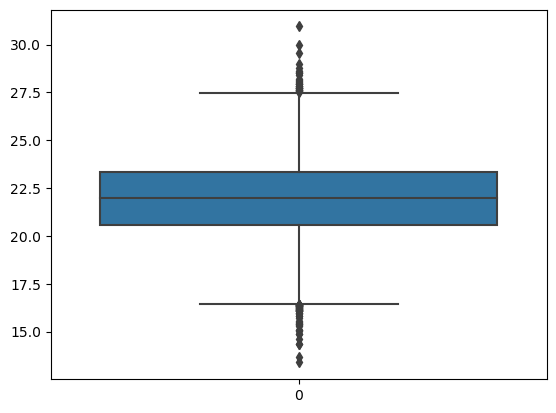

In [41]:
sns.boxplot(data[data["City"] == "Brasilia"]["AvgTemperature"].to_numpy())

In [48]:
ind = get_outliers(data[data["City"] == "Brasilia"]["AvgTemperature"]).index
data.loc[ind]

,City,date,AvgTemperature
405901,Brasilia,1995-06-08,15.722222
406288,Brasilia,1996-06-29,13.666667
406289,Brasilia,1996-06-30,14.333333
406608,Brasilia,1997-05-15,16.111111
406632,Brasilia,1997-06-08,15.944444
...,...,...,...
414742,Brasilia,2019-10-20,28.555556
414754,Brasilia,2019-11-01,27.944444
414764,Brasilia,2019-11-11,27.611111
414765,Brasilia,2019-11-12,28.500000


<Axes: >

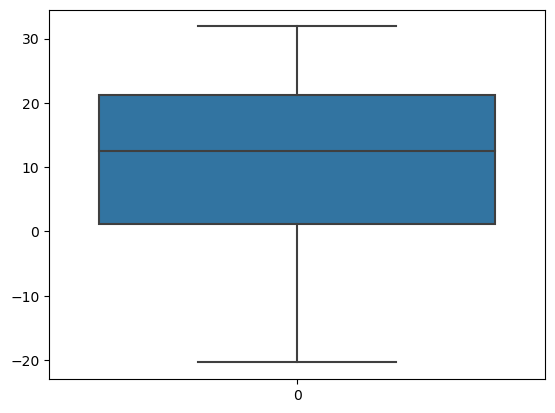

In [49]:
sns.boxplot(data[data["City"] == "Pyongyang"]["AvgTemperature"].to_numpy())

Again no outliers in Pyongyang because the data is not normally distributed. 

## Check for Normal Distribution: Draw Histogram and visually check if normal curve is close

Other statistical methods such as Kolmogorov-Smirnov, Shapiro-Wilk lead to hard facts

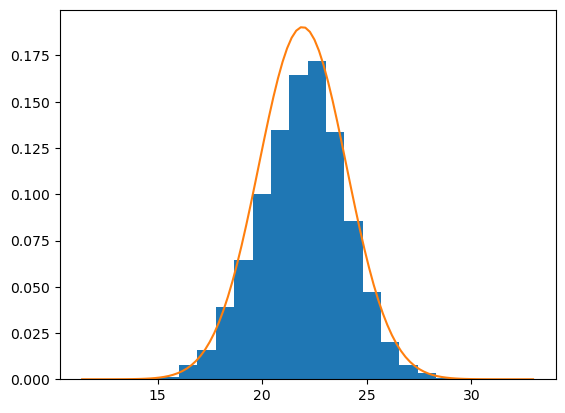

In [71]:
from scipy.stats import norm

p_data = data[data["City"] == "Brasilia"]["AvgTemperature"]
xmin, xmax = p_data.min() - 2, p_data.max() + 2
mu, std = p_data.mean(), p_data.std()
weights = np.ones_like(p_data)/float(len(p_data))
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std) 
plt.hist(p_data, bins=20, weights=weights)
plt.plot(x, p)
plt.show()